In [2]:
#Basic Data Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'notebook'
import seaborn as sns
import plotly
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff

#Warning Management Library
from warnings import filterwarnings

#Data Pre-Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import missingno as msno

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

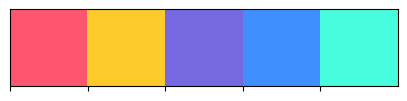

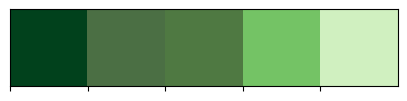

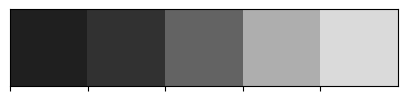

In [43]:
makershala_pallete = ["#fe566f", "#fccb2a", '#7669df', '#3f8ffe', '#46fdde']
grey_scale = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
forest_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
#new_colours = ['#ffffff','#ffffff','#ffffff','#ffffff','#ffffff']
sns.palplot(makershala_pallete)
sns.palplot(forest_green)
sns.palplot(grey_scale)
#sns.palplot(new_colours)

colors_green = forest_green
colors_blue = makershala_pallete
colors_dark = grey_scale

In [4]:
file_path = "/kaggle/input/water-quality-prediction-makershala/water_potability.csv"

In [5]:
df = pd.read_csv(file_path)

In [6]:
#The code below displays top 5 rows of the dataframe (a table like format generated by pandas library of python using csv or other similar files.)
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [7]:
# .info() method of dataframe displays crucial information about a dataset, including range of values, datatypes of all columns and number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
# .describe() method dispalys basic statististical figures for all relevant columns of the data set. Relevancy depnds on the type of value present in each column.  
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [9]:
#An extra attribute named "inlucde = 'all'" can display values for columns that has irrelavant or non-numerical values too.
df.describe(include = 'all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [24]:
potability_pie_chart= pd.DataFrame(df['Potability'].value_counts())

print(potability_pie_chart)

            count
Potability       
0            1998
1            1278


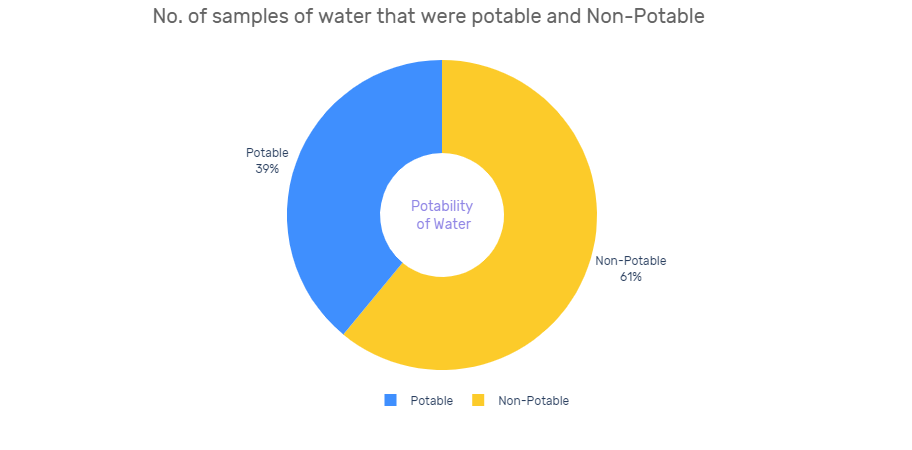

In [25]:
fig = px.pie(potability_pie_chart,values='count',names=['Non-Potable','Potable'],hole=0.4,opacity=1,
            color_discrete_sequence=[makershala_pallete[1],makershala_pallete[3]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='Potability<br> of Water',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.8,font_family='rubik', font_color='#7669df')

fig.update_layout(
    font_family='rubik',
    title=dict(text='No. of samples of water that were potable and Non-Potable',x=0.47,y=0.98,
               font=dict(color=grey_scale[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

# **Write Descritpion about hardness of water**

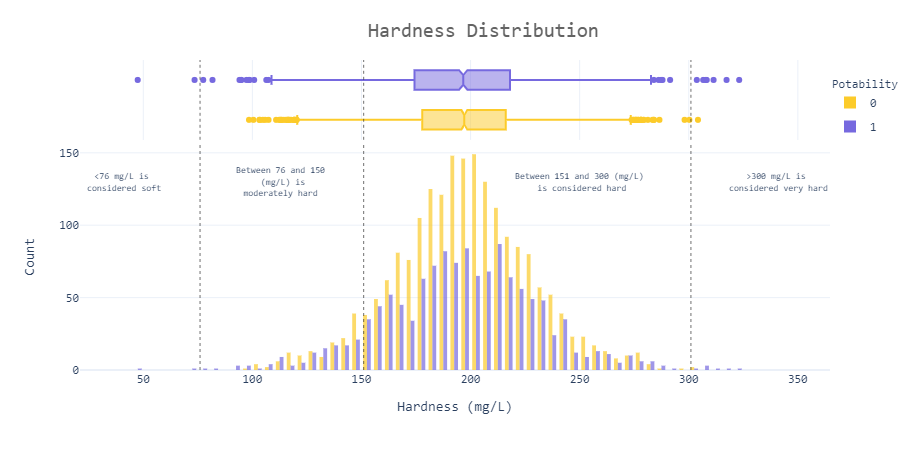

In [32]:

fig_histo_hardness = px.histogram(df,x='Hardness',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig_histo_hardness.add_vline(x=151, line_width=1, line_color=grey_scale[1],line_dash='dot',opacity=0.7)
fig_histo_hardness.add_vline(x=301, line_width=1, line_color=grey_scale[1],line_dash='dot',opacity=0.7)
fig_histo_hardness.add_vline(x=76, line_width=1, line_color=grey_scale[1],line_dash='dot',opacity=0.7)

fig_histo_hardness.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig_histo_hardness.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig_histo_hardness.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig_histo_hardness.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig_histo_hardness.update_layout(
    font_family='monospace',
    title=dict(text='Hardness Distribution',x=0.53,y=0.95,
               font=dict(color=grey_scale[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=grey_scale[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig_histo_hardness.show()

# Write description about PH of water

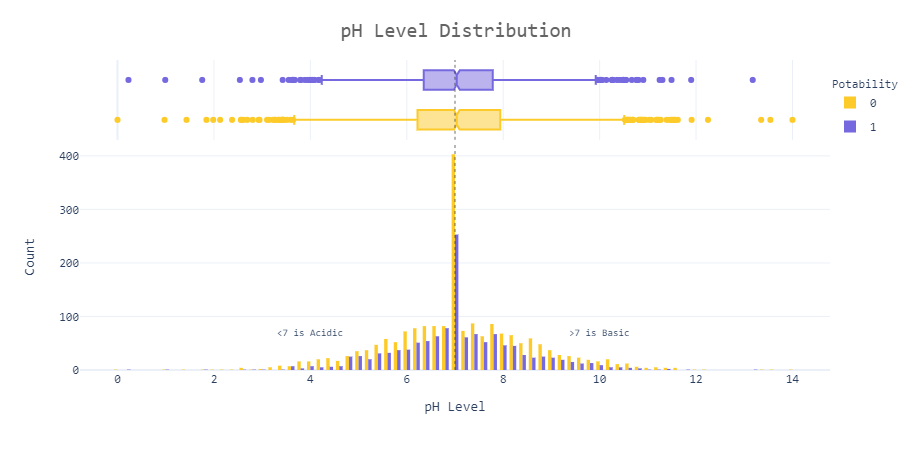

In [99]:
fig = px.histogram(df,x='ph',color='Potability',template='plotly_white',
                  marginal='box',opacity=1.0,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=grey_scale[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)

fig.update_layout(
    font_family='monospace',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=grey_scale[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=grey_scale[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about TDS

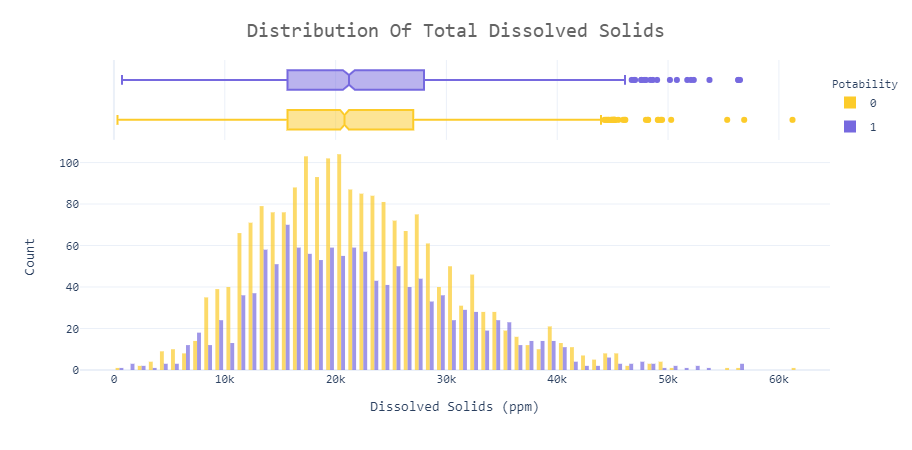

In [100]:
fig = px.histogram(df,x='Solids',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=grey_scale[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=grey_scale[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about Chloramines

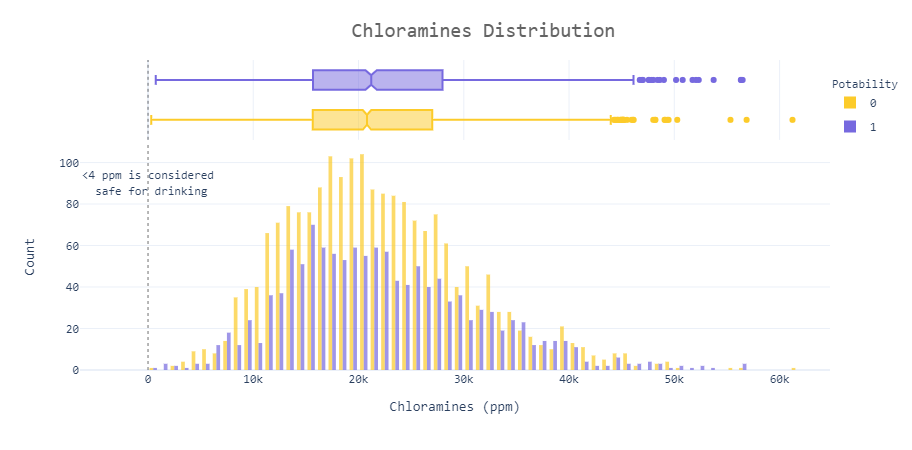

In [101]:
ig = px.histogram(df,x='Chloramines',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,)
fig.show()

# Description about Sulphate

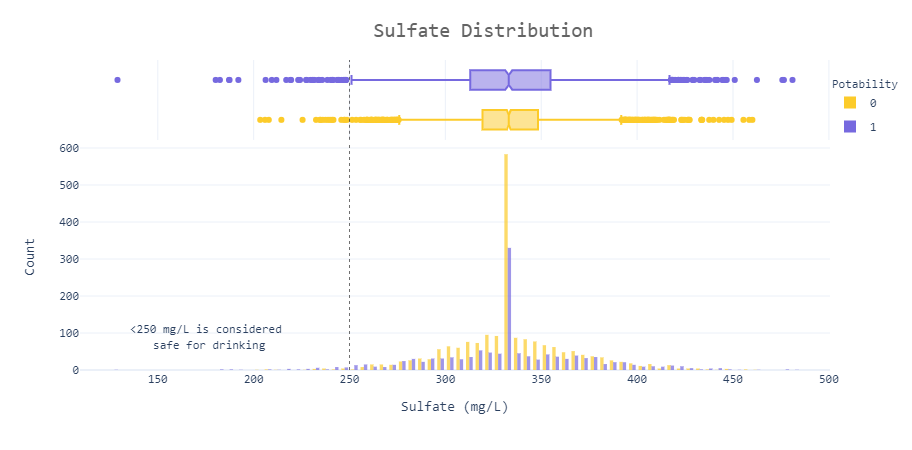

In [102]:
fig = px.histogram(df,x='Sulfate',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about Conductivity

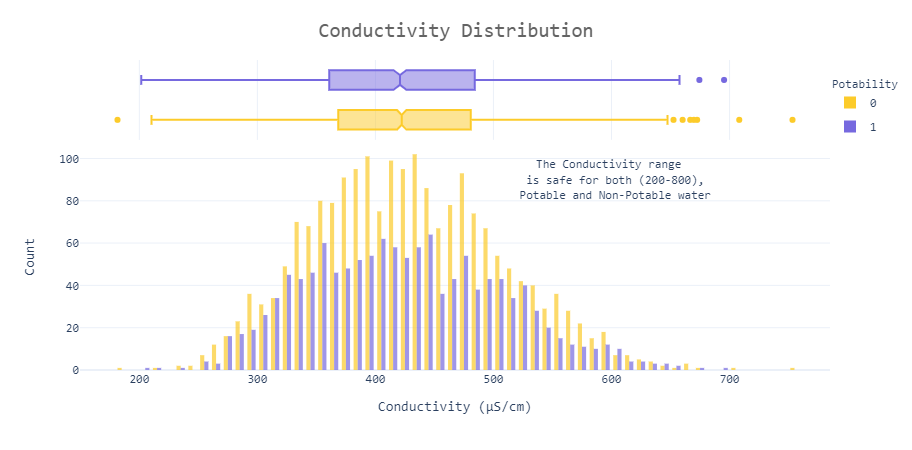

In [103]:
fig = px.histogram(df,x='Conductivity',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about Organic Carbon

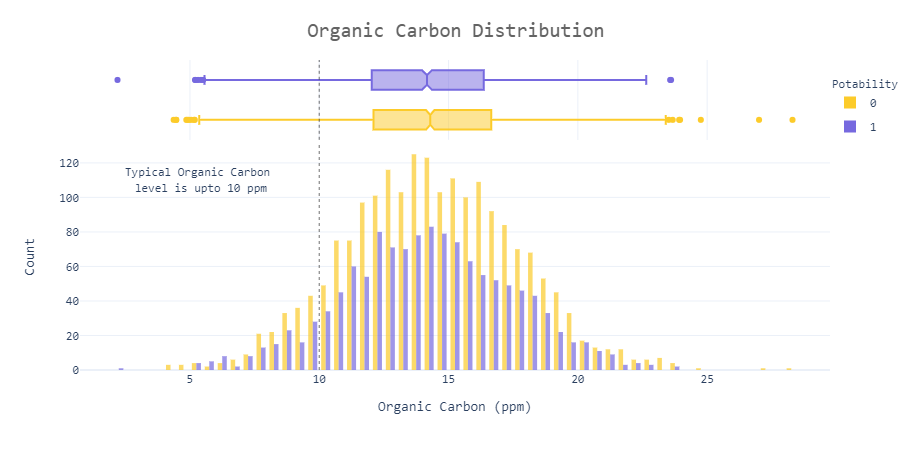

In [104]:
fig = px.histogram(df,x='Organic_carbon',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about Trihalomethanes

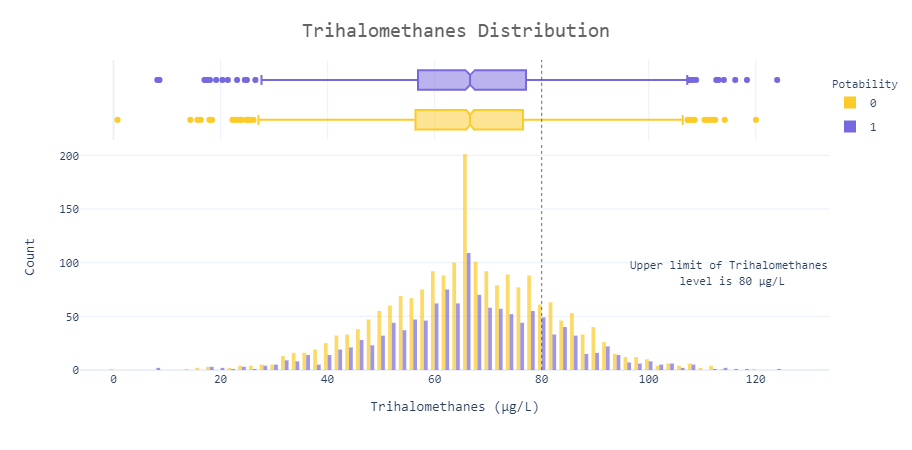

In [105]:

fig = px.histogram(df,x='Trihalomethanes',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    font_family='monospace',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about Turbidity

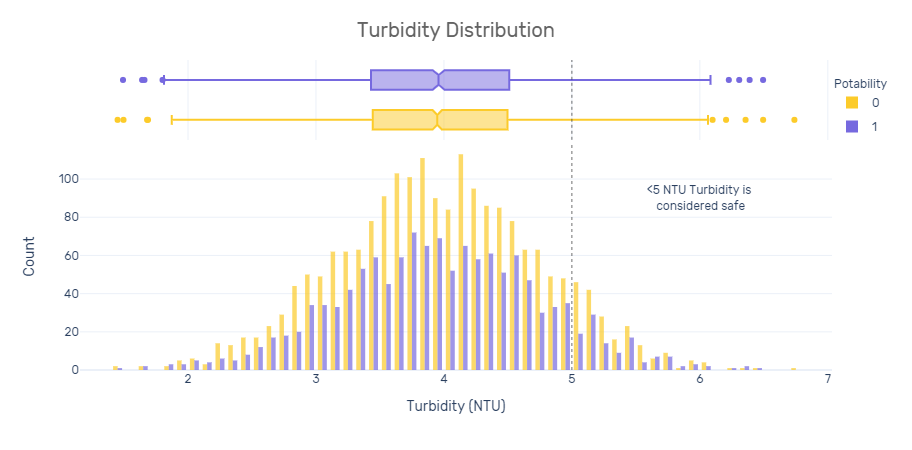

In [106]:

fig = px.histogram(df,x='Turbidity',color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[makershala_pallete[1],makershala_pallete[2]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    font_family='rubik',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

# Description about Scatter Plot Matrix and Correlation

In [58]:
drop_potability = df.drop('Potability',axis=1)

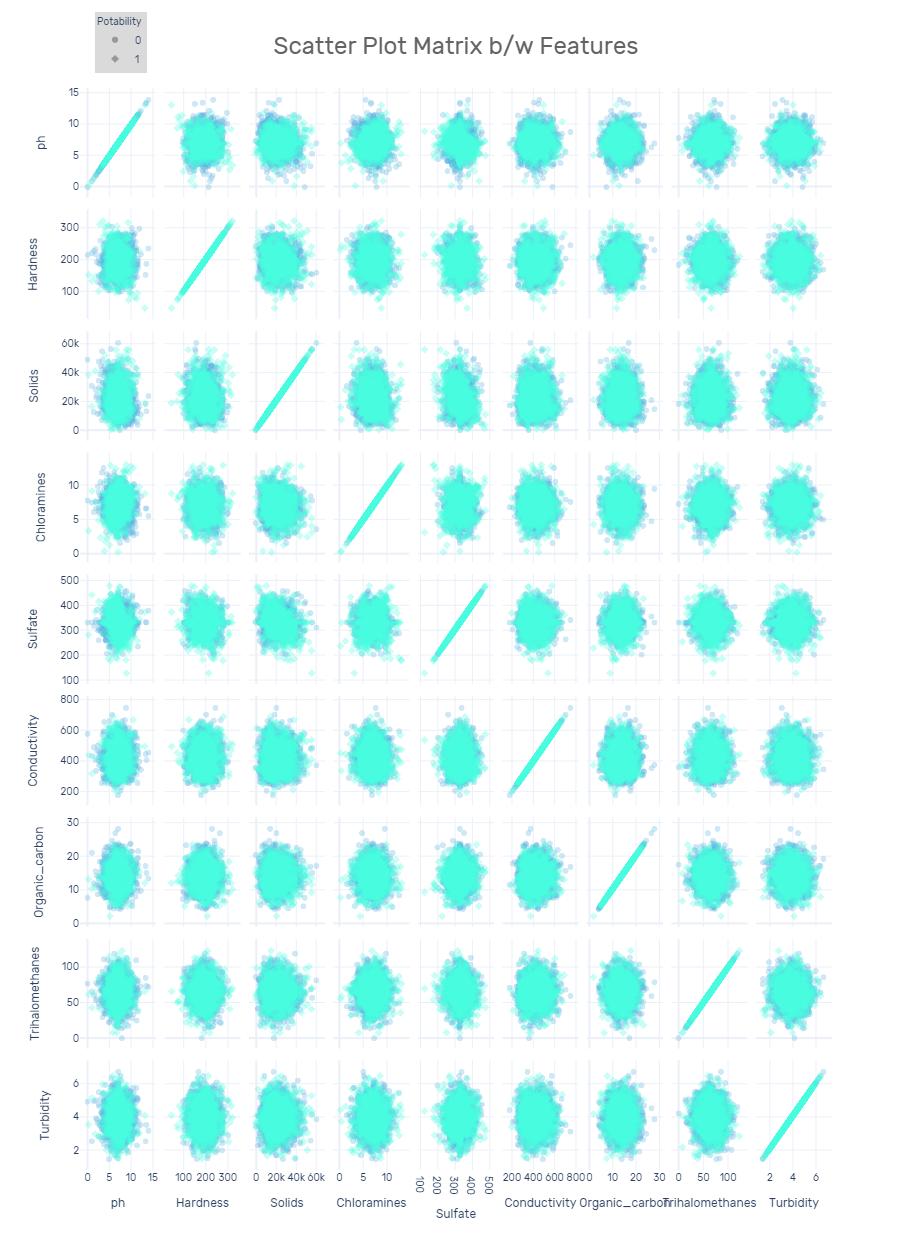

In [119]:
fig = px.scatter_matrix(df,drop_potability,height=1250,width=1250,template='plotly_white',opacity=0.3,
                        color_discrete_sequence=[colors_blue[1],colors_green[3]],color='Potability',
                       symbol='Potability',color_continuous_scale=[makershala_pallete[2],makershala_pallete[4]])

fig.update_layout(font_family='rubik',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

# Descriptio about correlation coefficients 

In [68]:
correlation_matrix = df.drop('Potability',axis=1).corr()
correlation_matrix

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242        -0.009143   0.019546  
Chloramines         -0.020486       -0.012653         0.017084   0.002363  
Sulfate             -0.016121        0.030831        -0.030274  -0.011187  
Conductivity         1.000000        0.020966         0.001285   0.005798  
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308  
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145  
Turbidity            0.005798       -0.027308        -0.022145   1.000000

# Description about heat maps

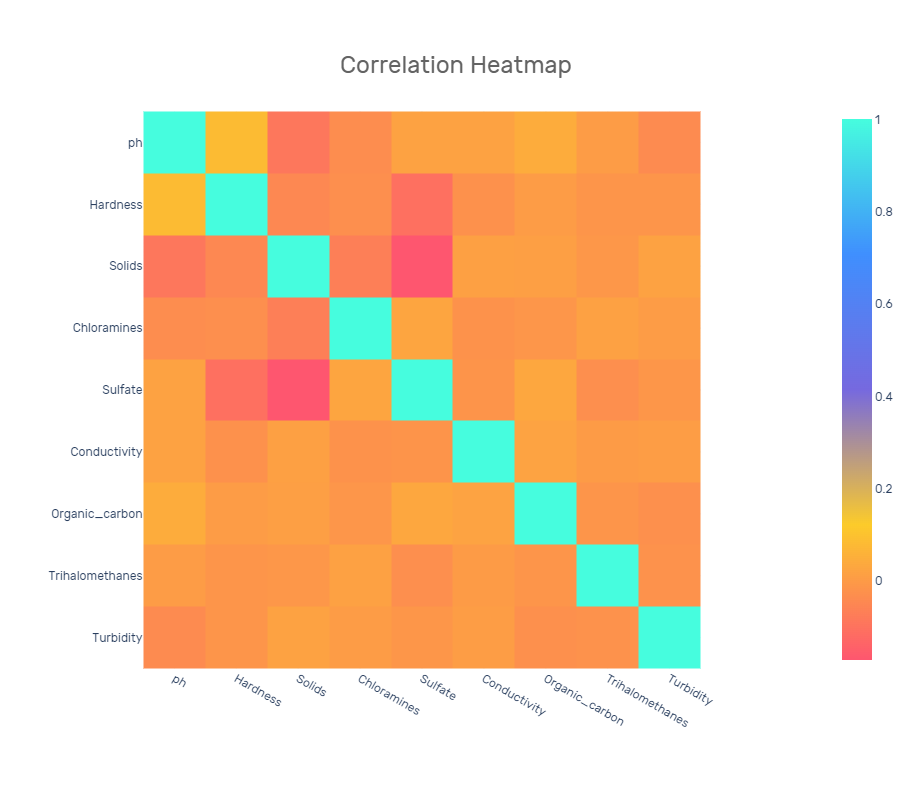

In [96]:
fig = px.imshow(correlation_matrix,height=800,width=800,color_continuous_scale=colors_blue,template='plotly_white')

fig.update_layout(font_family='rubik',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                             font=dict(color=colors_dark[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()

# Description and Data Preparation

1. Missing Value
2. Standardizing data

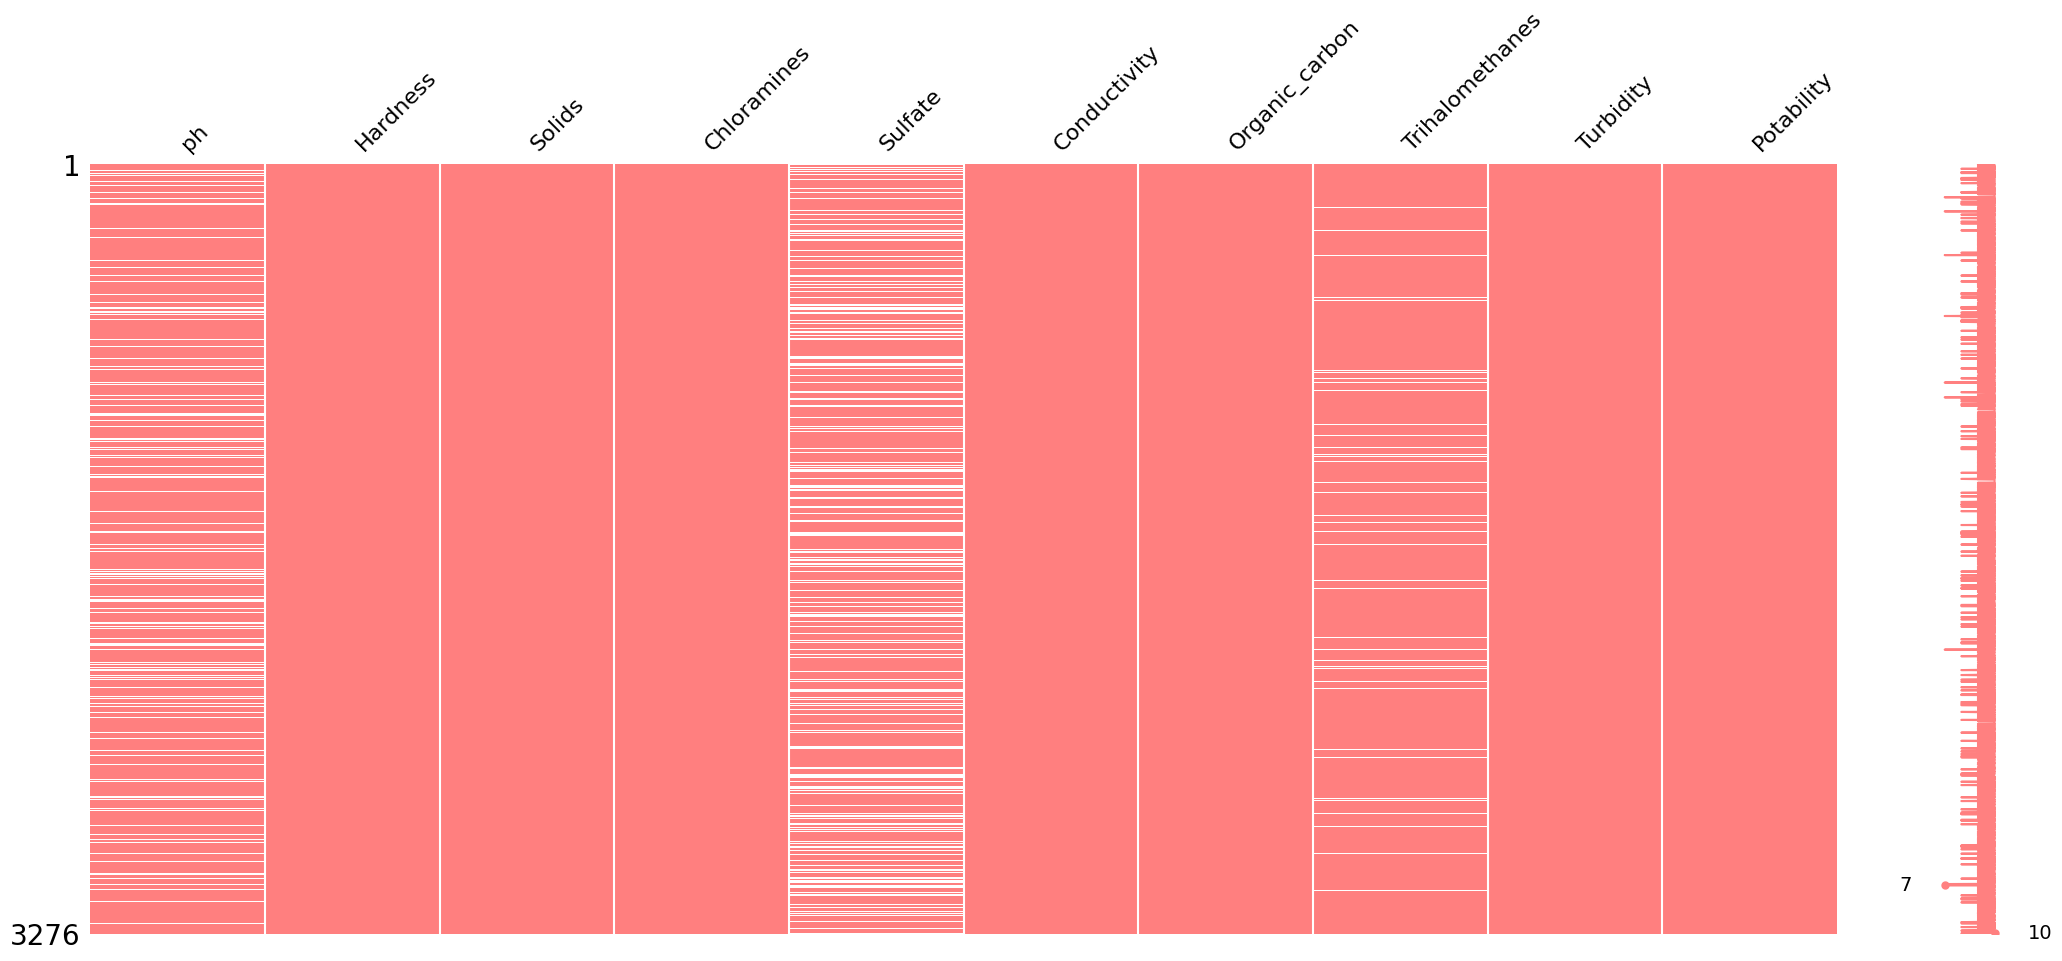

In [73]:
fig = msno.matrix(df,color= (1,0.5,0.5))

In [74]:
#Detetcing Null values in the dataset, colun wise

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [75]:
df[df['Potability']==0].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [76]:
df[df['Potability']==1].describe()

ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [77]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [78]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [85]:
#df['ph'].fillna(df['ph'].median(), inplace=True)
df.fillna({'ph': df['ph'].median()}, inplace=True)
#df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df.fillna({'Sulfate': df['Sulfate'].median()}, inplace=True)
#df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)
df.fillna({'Trihalomethanes': df['Trihalomethanes'].median()}, inplace=True)

In [86]:
#Recheck null values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Description on standardization of data

In [88]:
# Splitting Features and Labels 
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#Standardizing the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



# Description on Modelling
1. Spot Checking
2. Hyperparameter Tuning

In [90]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [91]:
finalResults

[('SVC', 0.6966295854853661),
 ('RF', 0.6750662231257315),
 ('XGB', 0.6453047991509531),
 ('NuSVC', 0.6440140356441925),
 ('GNB', 0.611372136512389),
 ('KNN', 0.610276073619632),
 ('DTC', 0.5796425996498095),
 ('ADA', 0.5600032379487594),
 ('Perc', 0.5166988189308038),
 ('SGDC', 0.504451566951567),
 ('NC', 0.4991565832435637),
 ('PAC', 0.49859239217471196),
 ('LR', 0.30671414038657174),
 ('Ridge', 0.30671414038657174),
 ('BNB', 0.30671414038657174)]

# Description about Hyperparameter Tuning

In [92]:
model_params = {
    'XGB':
    {
        'model':GradientBoostingClassifier(),
        'params':
        {
            'learning_rate':[0.0001,0.001,0.01,0.1],
            'n_estimators':[100,200,500,1000],
            'max_features':['sqrt','log2'],
            'max_depth':list(range(11))
        }
    },
    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'n_estimators':[10,50,100,200],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,11))
        }
    }
}

In [93]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=20)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

Model                                         Parameters     Score
0            XGB  {'n_estimators': 500, 'max_features': 'sqrt', ...  0.658269
1  Random Forest  {'n_estimators': 100, 'max_features': 'sqrt', ...  0.663766

# FINAL MODEL

In [94]:
param=data['Parameters']
model = VotingClassifier(estimators=[
                                     ('XGB',GradientBoostingClassifier(**param[0])),
                                     ('RF',RandomForestClassifier(**param[1])),
                                    ],voting='hard')

accuracy=[]
scaler = StandardScaler()
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    score=accuracy_score(y_test,predictions)
    accuracy.append(score)

In [95]:
np.mean(accuracy)

0.6570515267175573